##### 2-Dimensional Strip Packing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
rmax = 10
tmax = 12
tasks = 15

df = pd.DataFrame({
    'ti': np.random.randint(1, tmax, size=tasks),
    'ri': np.random.randint(1, 4, size=tasks)
})
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
ri,2,3,1,1,2,1,1,2,2,2,1,1,3,1,3
ti,1,10,9,3,5,7,2,7,3,8,2,4,10,3,9


In [3]:
def nfdh(tasks, W):
    df = tasks.sort_values(by='ti', ascending=False)
    df = df.reset_index(drop=True)
    
    level = 0
    time = [[df.ti[0]]]
    rank = [[df.ri[0]]]
    tmax = [df.ti[0]]
        
    for i, y in df[1:].iterrows():
        if W - np.sum(rank[level]) >= y.ri:
            rank[level].append(y.ri)
            time[level].append(y.ti)
        else:
            level += 1
            tmax.append(y.ti + tmax[level - 1])
            time.append([y.ti])
            rank.append([y.ri])
    
    return pd.DataFrame({
        'rank': rank,
        'time': time,
        'tmax': tmax
    }, columns=['rank', 'time', 'tmax'])

table = nfdh(df, W=rmax)
table

,rank,time,tmax
0,"[3, 3, 1, 3]","[10, 10, 9, 9]",10
1,"[2, 1, 2, 2, 1, 1]","[8, 7, 7, 5, 4, 3]",18
2,"[2, 1, 1, 1, 2]","[3, 3, 2, 2, 1]",21


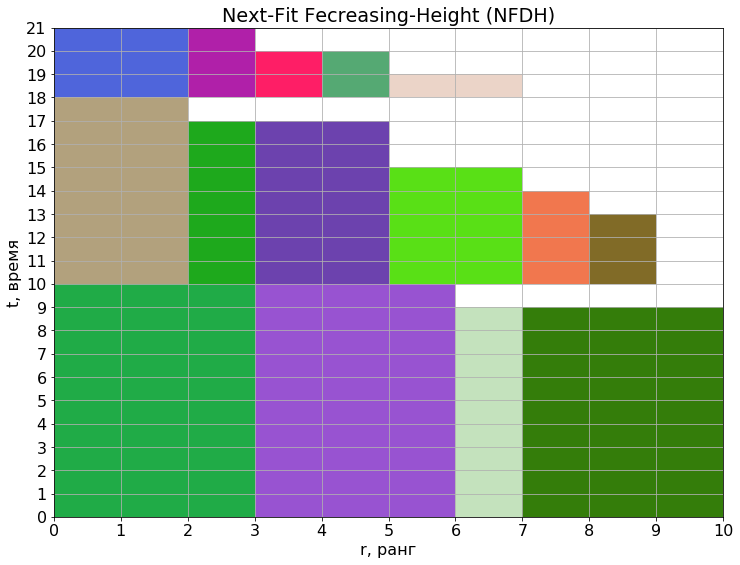

epsilon = 0.2727272727272727


In [4]:
def visualize(table, rmax, title):
    plt.rcParams.update({'font.size': 16})
    fig, ax = plt.subplots(figsize=(12, 9))

    ax.grid()
    ax.set(title=title, xlabel='r, ранг', ylabel='t, время')
    
    tmax = np.max(table.tmax)
    plt.xlim([0, rmax])
    plt.ylim([0, tmax])

    plt.xticks(np.arange(0, rmax+1))
    plt.yticks(np.arange(0, tmax+1))

    x, y = 0, 0
    for level, row in table.iterrows():
        for dx, dy in zip(row['rank'], row['time']):
            ax.add_patch(plt.Rectangle((x, y), dx, dy, fc=np.random.rand(3)))
            x += dx
        x, y = 0, row.tmax
    
    plt.show()

visualize(table, rmax, 'Next-Fit Fecreasing-Height (NFDH)')
sup_t = np.sum(df.ri * df.ti) / rmax
tmax = np.max(table.tmax)
print('epsilon = {}'.format((tmax - sup_t) / sup_t))

In [5]:
def ffdh(tasks, W):
    df = tasks.sort_values(by='ti', ascending=False)
    df = df.reset_index(drop=True)

    level = 0
    time = [[df.ti[0]]]
    rank = [[df.ri[0]]]
    tmax = [df.ti[0]]
    
    for i, y in df[1:].iterrows():
        index = -1
        for i in range(level + 1):
            if W - np.sum(rank[i]) >= y.ri:
                index = i
                break
        
        if index != -1:
            rank[index].append(y.ri)
            time[index].append(y.ti)
        else:
            level += 1
            tmax.append(y.ti + tmax[level - 1])
            time.append([y.ti])
            rank.append([y.ri])
    
    return pd.DataFrame({
        'rank': rank,
        'time': time,
        'tmax': tmax
    }, columns=['rank', 'time', 'tmax'])

table = ffdh(df, W=rmax)
table

,rank,time,tmax
0,"[3, 3, 1, 3]","[10, 10, 9, 9]",10
1,"[2, 1, 2, 2, 1, 1, 1]","[8, 7, 7, 5, 4, 3, 3]",18
2,"[2, 1, 1, 2]","[3, 2, 2, 1]",21


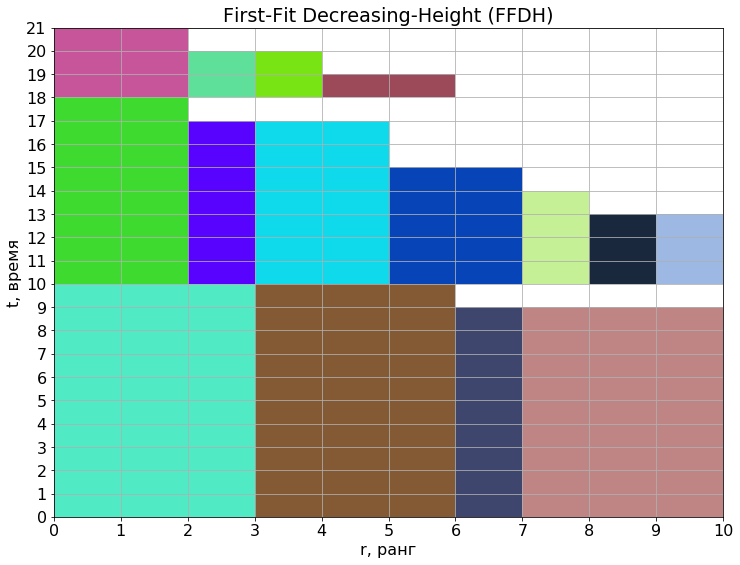

epsilon = 0.2727272727272727


In [6]:
visualize(table, rmax, 'First-Fit Decreasing-Height (FFDH)')
sup_t = np.sum(df.ri * df.ti) / rmax
tmax = np.max(table.tmax)
print('epsilon = {}'.format((tmax - sup_t) / sup_t))